In [1]:
import torch
print("PyTorch version: ", torch.__version__)
print("is cuda available: ", torch.cuda.is_available())

import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='TypedStorage is deprecated')

PyTorch version:  2.0.0+cu117
is cuda available:  True
CPU times: user 1.16 s, sys: 7.98 s, total: 9.14 s
Wall time: 1.19 s


In [2]:
%%time
from p2t2 import simulate

simulate(
    config_file="config.yaml",
    model_type="P2T2",
    min_te=5.0,
    max_te=15.0,
    n_echoes=20,
    num_signals=10000,
    out_folder='data'
)

WM
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
GM
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
CSF
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
WM_CSF
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
WM_GM
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
CSF_GM
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
Pathology
save Vf
save V mu
save V sigma
save V km
save V SNR
Fitting...please wait
done
CPU times: user 1h 2min 15s, sys: 24 s, total: 1h 2min 39s
Wall time: 1h 3min 28s


In [3]:
%%time
from p2t2 import train

train(
    config='config.yaml',
    data_folder="data",
    output_path="runs",
    model_type='P2T2-FC', 
    min_te=7.9,
    max_te=None
)

in channels = 40, num layers = 12
----------
epoch 1/1000
epoch 1 average loss: 787.6686
['pT2_mse val loss = 0.0033093187026679515', 'pT2_wass val loss = 452.9627020699637']
save new best model
epoch 1, val loss: 783.8946
best val loss: 783.894573 at epoch 1
----------
epoch 2/1000
epoch 2 average loss: 722.5146
['pT2_mse val loss = 0.0029844494686195894', 'pT2_wass val loss = 293.58879721505303']
save new best model
epoch 2, val loss: 592.0337
best val loss: 592.033744 at epoch 2
----------
epoch 3/1000
epoch 3 average loss: 548.1641
['pT2_mse val loss = 0.002754562529402652', 'pT2_wass val loss = 223.8409760611398']
save new best model
epoch 3, val loss: 499.2972
best val loss: 499.297229 at epoch 3
----------
epoch 4/1000
epoch 4 average loss: 505.3000
['pT2_mse val loss = 0.002800372538955084', 'pT2_wass val loss = 224.73580954415456']
epoch 4, val loss: 504.7731
best val loss: 499.297229 at epoch 3
----------
epoch 5/1000
epoch 5 average loss: 495.0167
['pT2_mse val loss = 0.0027

In [1]:
%%time
from p2t2 import infer
import os

data_root = 'mri_example/'
data_name = 'Brats18_TCIA13_645_1_t1_230318_221644_slice_100'
data_dict = {
    'mri': os.path.join(data_root, f'{data_name}.nii.gz'),
    'metadata': os.path.join(data_root, f'{data_name}_metadata.json') 
}

infer(
    model_type="P2T2-FC",
    model_path="runs/P2T2-FC__data_240430_14_52_52/best_model.pt",
    model_args_path="runs/P2T2-FC__data_240430_14_52_52/config.yaml",
    data_dict=data_dict,
    output_dir="output"
)

Uploading MRI data...
MRI data uploaded
Loading the model...
Model loaded
Deploying the model...
Computing EPGs...
EPGs computed


  0%|                                                                                            | 0/12 [00:00<?, ?it/s]/home/ang.a/.conda/envs/p2t2/lib/python3.10/site-packages/torch/_tensor.py:1295: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  ret = func(*args, **kwargs)
/home/ang.a/.conda/envs/p2t2/lib/python3.10/site-packages/torch/_tensor.py:1295: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  ret = func(*args, **kwargs)
/home/ang.a/.conda/envs/p2t2/lib/python3.10/site-packages/torch/_tensor.py:1295: UserWar

CPU times: user 8min 59s, sys: 20.6 s, total: 9min 20s
Wall time: 8min 44s


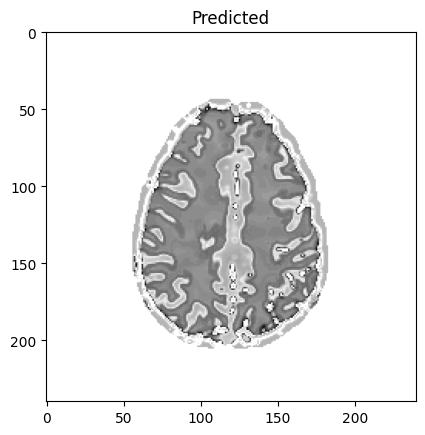

In [8]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

predicted = sitk.ReadImage("output/predicted_fa.nii.gz")
plt.imshow(sitk.GetArrayFromImage(predicted), cmap="gray");
plt.title("Predicted");

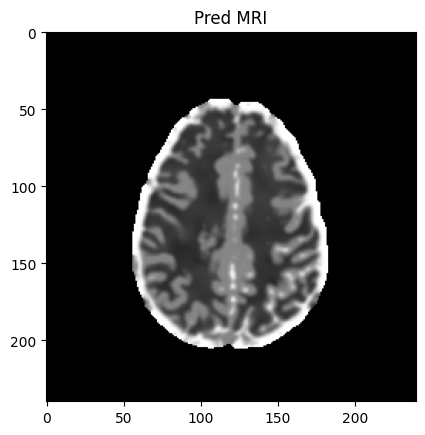

In [10]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

pred_mri = sitk.ReadImage("output/pred_mri.nii.gz")
plt.imshow(sitk.GetArrayFromImage(pred_mri)[10,:,:], cmap="gray");
plt.title("Pred MRI");

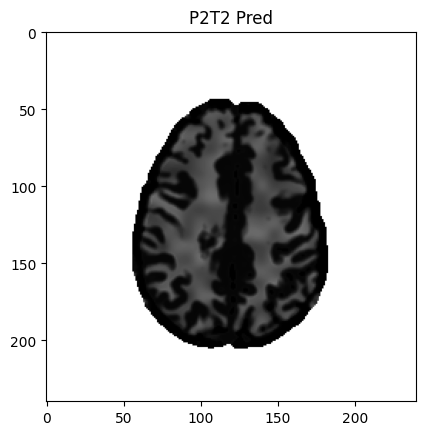

In [11]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

pt2_pred = sitk.ReadImage("output/pt2_pred.nii.gz")
plt.imshow(sitk.GetArrayFromImage(pt2_pred)[10,:,:], cmap="gray");
plt.title("P2T2 Pred");